## Student profile analysis to identify potential accomodation locations

### Alright, now let us import the raw dataset for student preferences...

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import geopandas as gpd
import matplotlib.cm as cm
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas import json_normalize
print("All packages imported!")

All packages imported!


In [2]:
meta=pd.read_csv("food_coded.csv")

In [3]:
data=meta[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
data.dropna()
data.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


# Data Cleaning

In [4]:
data.columns

Index(['cook', 'eating_out', 'employment', 'ethnic_food', 'exercise',
       'fruit_day', 'income', 'on_off_campus', 'pay_meal_out', 'sports',
       'veggies_day'],
      dtype='object')

In [6]:
column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']
d=data[column]

In [7]:
d.shape

(125, 11)

In [8]:
s=d.dropna()

In [9]:
s.head(2)

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4


## Identifying the different kinds of students

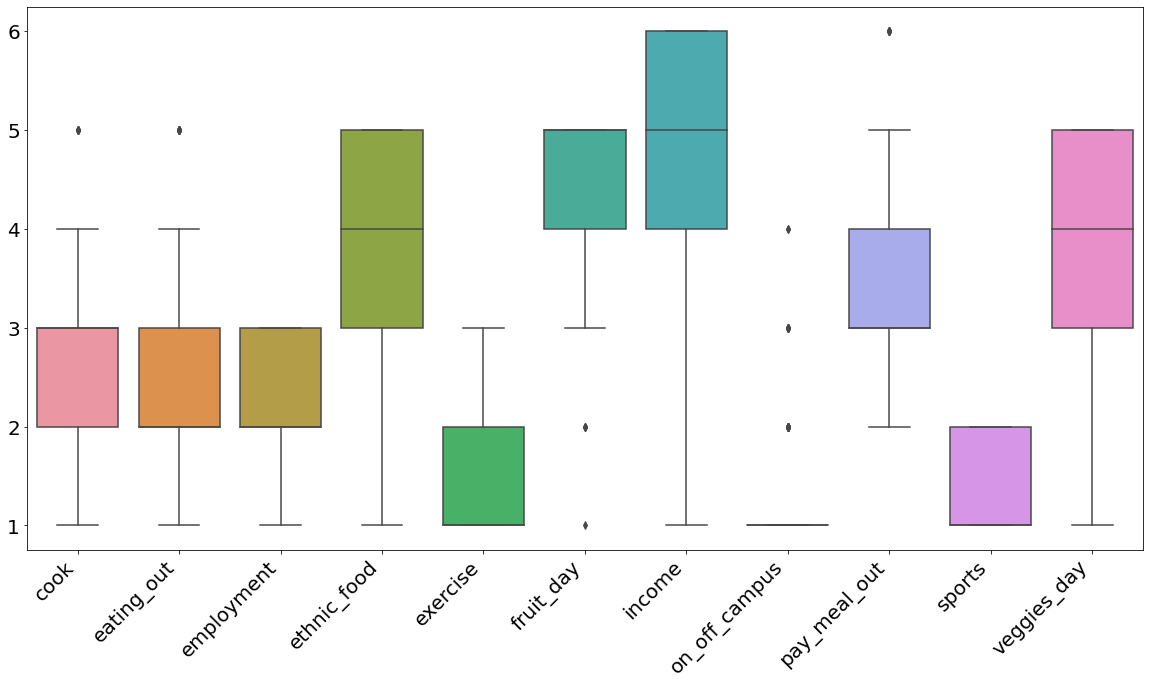

In [10]:
plt.figure(figsize=(20, 10))
sns.boxplot
ax = sns.boxplot(data = d)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\veloc\AppData\Local\Temp\ipykernel_628\4207900741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Cluster']=kmeans.labels_
C:\Users\veloc\AppData\Local\Temp\ipykernel_628\4207900741.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = s[s['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\veloc\AppData\Local\Temp\ipykernel_628\4207900741.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = s[s['Cluster'] == k].drop('Cluster',1), ax=axes[k])


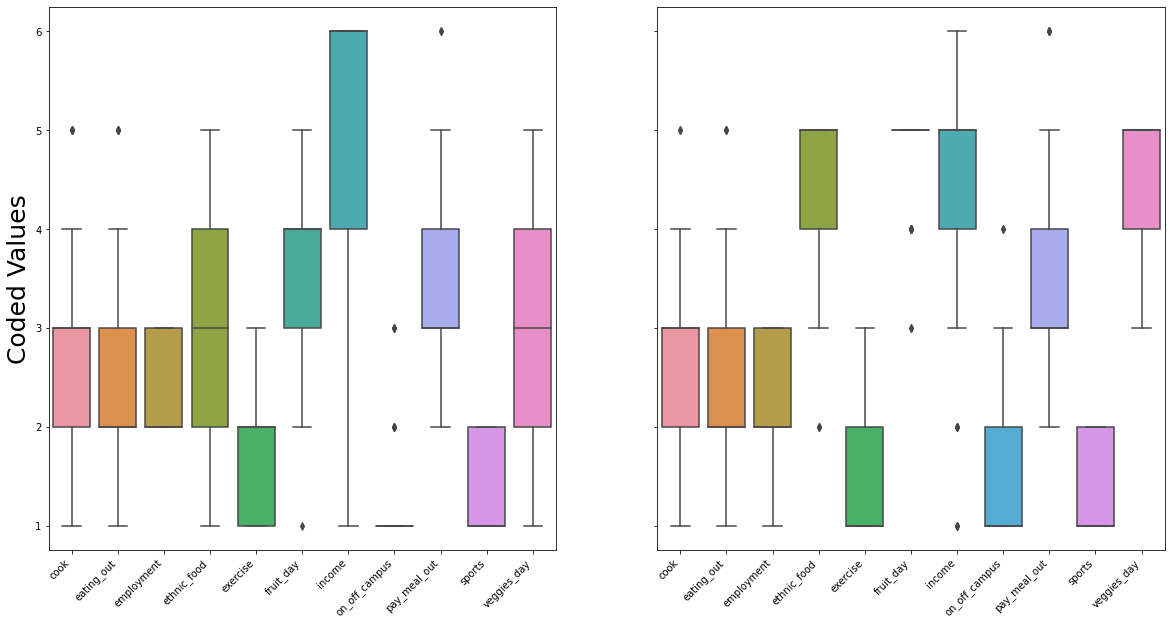

In [11]:
# set number of clusters
kclusters = 2
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(s)
s['Cluster']=kmeans.labels_
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=25)

for k in range(kclusters):
     plt.sca(axes[k])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(data = s[s['Cluster'] == k].drop('Cluster',1), ax=axes[k])        
plt.show()

C:\Users\veloc\AppData\Local\Temp\ipykernel_628\2356380052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Cluster']=kmeans.labels_
C:\Users\veloc\AppData\Local\Temp\ipykernel_628\2356380052.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = s[s['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\veloc\AppData\Local\Temp\ipykernel_628\2356380052.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = s[s['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\veloc\AppData\Local\Temp\ipykernel_628\2356380052.py:12: FutureWar

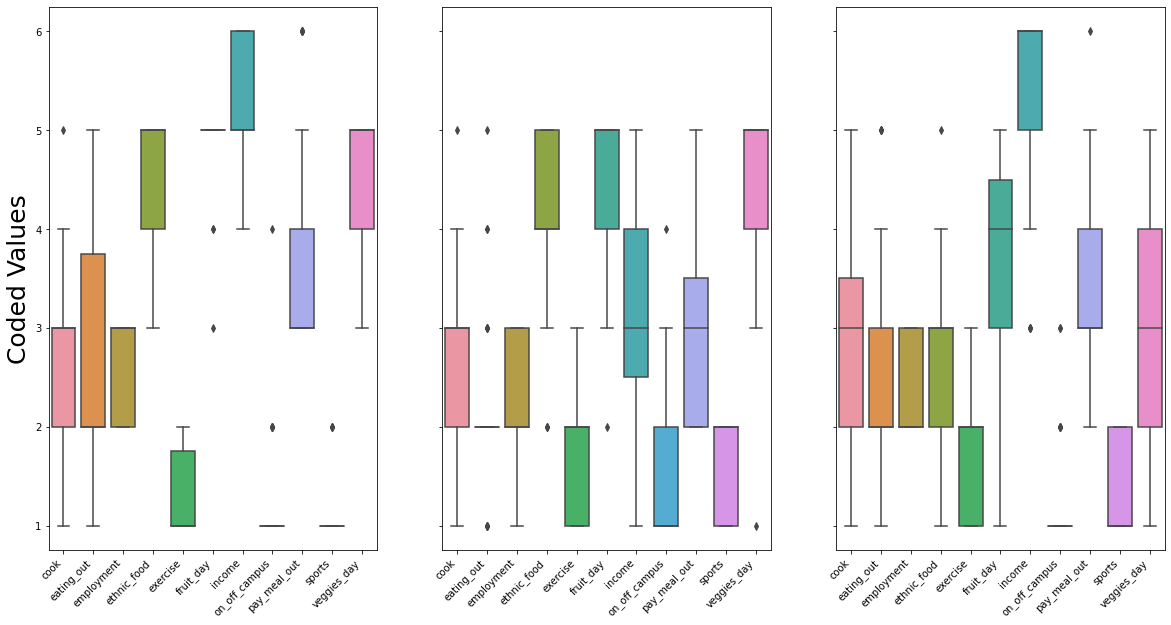

In [12]:
# set number of clusters
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(s)
s['Cluster']=kmeans.labels_
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=25)

for k in range(kclusters):
     plt.sca(axes[k])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(data = s[s['Cluster'] == k].drop('Cluster',1), ax=axes[k])        
plt.show()

## Finding the students a home

In [ ]:
My analysis will be on the city I currently reside in, i.e Nagpur, India!
Specifically, I will begin by looking at the housing areas around my college.
We begin by defining the parameters of our foursquare seach query

In [13]:
search_query = 'Apartment' #Search for residential locations
radius = 20000             #Set the radius to 20 kilometres due to traffic constraints
latitude=21.1218           #College location
longitude=79.0669   

In [14]:
CLIENT_ID = '5O2OQN1HOFBER5CQ4VJSEBU3PZ54Z3T31EGTNFJ0V04KSKZI'
CLIENT_SECRET = 'H2KIZ3QZRGZD2GVCOSSTL04SQ3N0Y5QWEWQKPQ1VTPQNF24R'
VERSION = '20180604'
LIMIT = 1000

In [15]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [16]:
results = requests.get(url).json()

In [17]:
results

{'meta': {'code': 200, 'requestId': '63bfcb0434f7800467ccf959'},
 'response': {'venues': [{'id': '4f490e12e4b0f85d08c3b3a0',
    'name': 'Oriental Apartment',
    'location': {'lat': 21.119155634148303,
     'lng': 79.07602162017301,
     'labeledLatLngs': [{'label': 'display',
       'lat': 21.119155634148303,
       'lng': 79.07602162017301}],
     'distance': 991,
     'cc': 'IN',
     'country': 'India',
     'formattedAddress': ['India']},
    'categories': [{'id': '4d954b06a243a5684965b473',
      'name': 'Residential Building (Apartment / Condo)',
      'pluralName': 'Residential Buildings (Apartments / Condos)',
      'shortName': 'Residential',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1673513733',
    'hasPerk': False},
   {'id': '4ebe8fe129c25ce5a165bbe9',
    'name': 'Chandrabhaga Apartment',
    'location': {'address': 'Plot No. 20, Shree Nagar, Parsodi',
  

In [18]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(8)

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode,location.city,location.state
0,4f490e12e4b0f85d08c3b3a0,Oriental Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1673513733,False,21.119156,79.076022,"[{'label': 'display', 'lat': 21.11915563414830...",991,IN,India,[India],NaN,NaN,NaN,NaN,NaN
1,4ebe8fe129c25ce5a165bbe9,Chandrabhaga Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1673513733,False,21.115409,79.046502,"[{'label': 'display', 'lat': 21.11540944551265...",2234,IN,India,"[Plot No. 20, Shree Nagar, Parsodi (Gayatri Ma...","Plot No. 20, Shree Nagar, Parsodi",Gayatri Mandir Road,440022,Nagpur,Mahārāshtra
2,582abbb4f294fc54af715c1c,govind apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1673513733,False,21.136558,79.050038,"[{'label': 'display', 'lat': 21.136558, 'lng':...",2400,IN,India,[India],NaN,NaN,NaN,NaN,NaN
3,54996ca1498eec3345fbd8e2,Sundar Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1673513733,False,21.130167,79.094978,"[{'label': 'display', 'lat': 21.13016700744629...",3060,IN,India,[India],NaN,NaN,NaN,NaN,NaN
4,58c03ae113af1c752e99ec4e,Shiv Shail Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1673513733,False,21.123249,79.058199,"[{'label': 'display', 'lat': 21.123249, 'lng':...",917,IN,India,[India],NaN,NaN,NaN,NaN,NaN
5,501bfb3ae4b045e9f1b8c346,yash apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1673513733,False,21.145016,79.112775,"[{'label': 'display', 'lat': 21.14501579925644...",5419,IN,India,[India],NaN,NaN,NaN,NaN,NaN
6,588ba547288b6a4be142a787,Raghukul 8 Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1673513733,False,21.135108,79.071758,"[{'label': 'display', 'lat': 21.135108, 'lng':...",1564,IN,India,[India],NaN,NaN,NaN,NaN,NaN
7,59a9643c4a1cc02d7a53af5c,Shreyans Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1673513733,False,21.149825,79.126842,"[{'label': 'display', 'lat': 21.149825, 'lng':...",6961,IN,India,"[Nagpur 440026, Mahārāshtra, India]",NaN,NaN,440026,Nagpur,Mahārāshtra


In [19]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.drop([4],axis=0,inplace=True) #remove some unwanted locations like hotels
dataframe_filtered.drop(['cc','country','state','city'],axis=1,inplace=True) #no need for those columns as we know we're in nagpur
dataframe_filtered.head()

,name,categories,lat,lng,labeledLatLngs,distance,formattedAddress,address,crossStreet,postalCode,id
0,Oriental Apartment,Residential Building (Apartment / Condo),21.119156,79.076022,"[{'label': 'display', 'lat': 21.11915563414830...",991,[India],NaN,NaN,NaN,4f490e12e4b0f85d08c3b3a0
1,Chandrabhaga Apartment,Residential Building (Apartment / Condo),21.115409,79.046502,"[{'label': 'display', 'lat': 21.11540944551265...",2234,"[Plot No. 20, Shree Nagar, Parsodi (Gayatri Ma...","Plot No. 20, Shree Nagar, Parsodi",Gayatri Mandir Road,440022,4ebe8fe129c25ce5a165bbe9
2,govind apartment,Residential Building (Apartment / Condo),21.136558,79.050038,"[{'label': 'display', 'lat': 21.136558, 'lng':...",2400,[India],NaN,NaN,NaN,582abbb4f294fc54af715c1c
3,Sundar Apartment,Residential Building (Apartment / Condo),21.130167,79.094978,"[{'label': 'display', 'lat': 21.13016700744629...",3060,[India],NaN,NaN,NaN,54996ca1498eec3345fbd8e2
5,yash apartment,Residential Building (Apartment / Condo),21.145016,79.112775,"[{'label': 'display', 'lat': 21.14501579925644...",5419,[India],NaN,NaN,NaN,501bfb3ae4b045e9f1b8c346


In [20]:
#define coordinates of the college
map_nag=folium.Map(location=[21.1479,79.0396],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
labels = list(dataframe_filtered.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_nag)    
    
# add incidents to map
map_nag.add_child(locations)

map_nag

In [21]:
df_evaluate=dataframe_filtered[['lat','lng']]

In [22]:
RestList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 1000                             #Set the radius to 10 kilometres for convenience
    latitude=lat                              #Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant'               #Search for any food related locations
    results = requests.get(url).json()        # assign relevant part of JSON to venues
    venues = results['response']['venues']    # tranform venues into a dataframe

In [23]:
FruitList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 1000                             #Set the radius to 10 kilometres for convenience
    latitude=lat                              #Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Fruit'                    #Search for any food related locations
    results = requests.get(url).json()        # assign relevant part of JSON to venues
    venues = results['response']['venues']    # tranform venues into a dataframe

In [24]:
kclusters = 3
from sklearn.cluster import KMeans
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate.head(10)

C:\Users\veloc\AppData\Local\Temp\ipykernel_628\2412664374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Cluster']=kmeans.labels_
C:\Users\veloc\AppData\Local\Temp\ipykernel_628\2412664374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)


,lat,lng,Cluster
0,21.119156,79.076022,0
1,21.115409,79.046502,0
2,21.136558,79.050038,0
3,21.130167,79.094978,1
5,21.145016,79.112775,1
6,21.135108,79.071758,0
7,21.149825,79.126842,1
8,21.137883,79.061253,0
9,21.138454,79.060944,0
10,21.151516,79.088387,1


In [25]:
#define coordinates of the college
map_nag=folium.Map(location=[21.1281,79.0669],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()
# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_evaluate.lat)
longitudes = list(df_evaluate.lng)
labels = list(df_evaluate.Cluster)
names=list(dataframe_filtered.name)
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_nag)

# add locations to map
map_nag.add_child(locations)

map_nag

## Discussion

## Conclusion